# Shor's Factorization Algorithm

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from math import pi, gcd
from fractions import Fraction

In [6]:
N = 15
m = 2
n_shots = 8

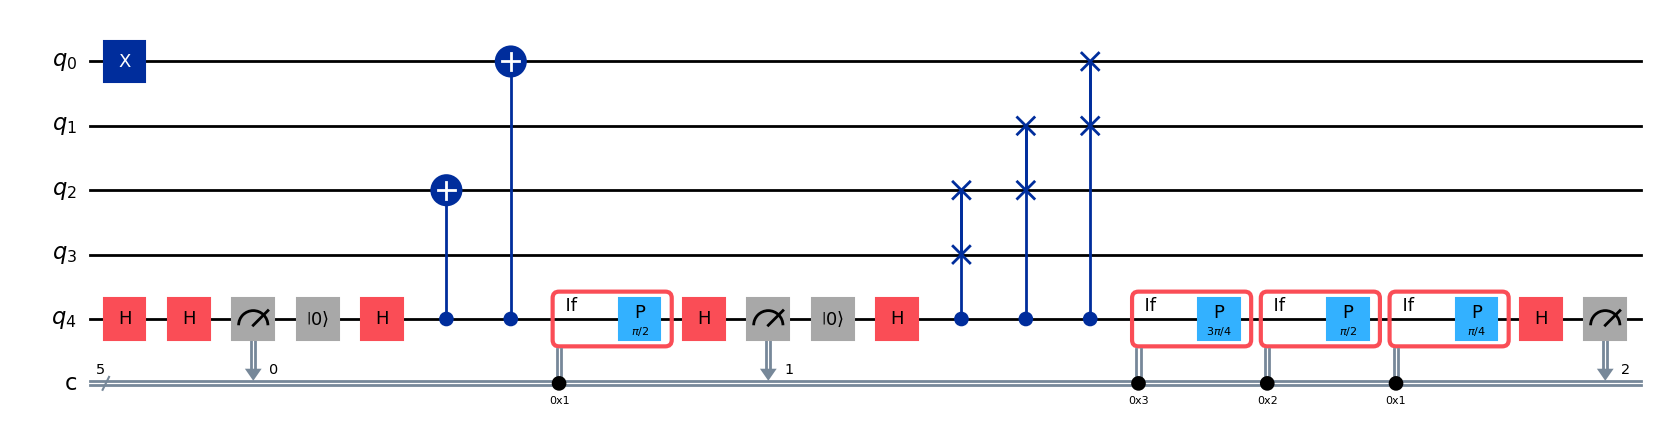

In [7]:
n = 5 # Number of input qubits
qr = QuantumRegister(n, 'q')
cr = ClassicalRegister(n, 'c')
qc = QuantumCircuit(qr, cr)

qc.x(qr[0]) # Initialize q[0] to |1>

# Apply m**4 mod 15
qc.h(qr[4])
qc.h(qr[4])
qc.measure(qr[4],cr[0])
qc.reset(qr[4]) # Reinitialise q[4] to |0>

# Apply m**2 mod 15
qc.h(qr[4])
qc.cx(qr[4],qr[2])
qc.cx(qr[4],qr[0])
with qc.if_test((cr, 1)):
    qc.p(pi/2, qr[4])
qc.h(qr[4])
qc.measure(qr[4],cr[1])
qc.reset(qr[4]) # Reinitialise q[4] to |0>

# Apply m mod 15
qc.h(qr[4])
qc.cswap(4, 3, 2)
qc.cswap(4, 2, 1)
qc.cswap(4, 1, 0)
with qc.if_test((cr, 3)):
    qc.p(3.*pi/4, qr[4])
with qc.if_test((cr, 2)):
    qc.p(pi/2, qr[4])
with qc.if_test((cr, 1)):
    qc.p(pi/4, qr[4])
qc.h(qr[4])
qc.measure(qr[4],cr[2])

qc.draw(output='mpl')

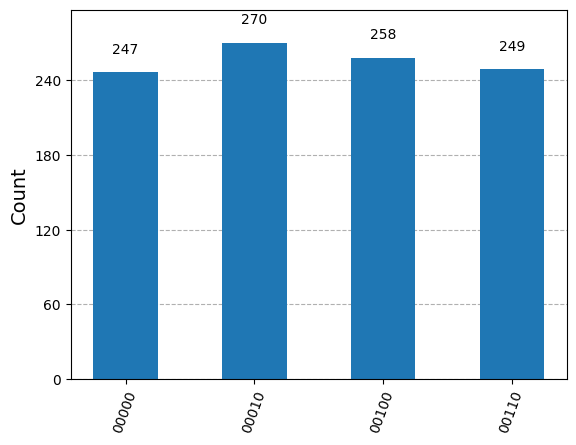

In [8]:
# Execute code on a simulator
backend = AerSimulator()
result = backend.run(qc, shots=1024).result()
counts = result.get_counts(qc)
plot_histogram(counts)

In [9]:
found = False

for bitstring in counts:
    x = int(bitstring, 2)  # Convert bitstring (e.g., '010') to integer (e.g., 2)
    if x == 0:
        continue  # Skip x=0 (trivial)
    
    # Step 3: Continued fraction expansion to find candidate period r
    frac = Fraction(x, n_shots)
    r_candidate = frac.denominator
    
    # Step 4: Check if r_candidate is a valid period (m^r ≡ 1 mod N)
    if pow(m, r_candidate, N) == 1:
        print(f"Found candidate period r = {r_candidate} from x = {x}")
        
        # Step 5: Check if r is even and non-trivial
        if r_candidate % 2 == 0:
            half_r = r_candidate // 2
            m_half = pow(m, half_r, N)
            
            if m_half not in [1, N-1]:  # Avoid trivial factors
                p = gcd(m_half + 1, N)
                q = gcd(m_half - 1, N)
                print(f"Factors of {N}: {p} and {q}")
                found = True
                break
            else:
                print(f"Trivial result: m^{half_r} ≡ {m_half} mod {N}. Try another x.")
        else:
            print(f"Period r = {r_candidate} is odd. Try another x.")

if not found:
    print("No valid period found. Retry with more shots or a different m.")

Found candidate period r = 4 from x = 2
Factors of 15: 5 and 3
